In [12]:
from torch import Tensor as T
from torch.autograd import Variable
import torchvision
import numpy as np
from io import BytesIO
import PIL.Image
from IPython.display import Image, display

In [67]:
def DisplayFractal(a, fmt='jpeg'):
    """Display an array of iteration counts as a colorful picture
    of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [156]:
def MandelbrotIter(vx, vy, cx, cy, w):
    x = vx*vx-vy*vy + cx
    y = 2*vx*vy + cy
    w = w + ((x.data*x.data + y.data*y.data) < 4).float()
    return x, y, w

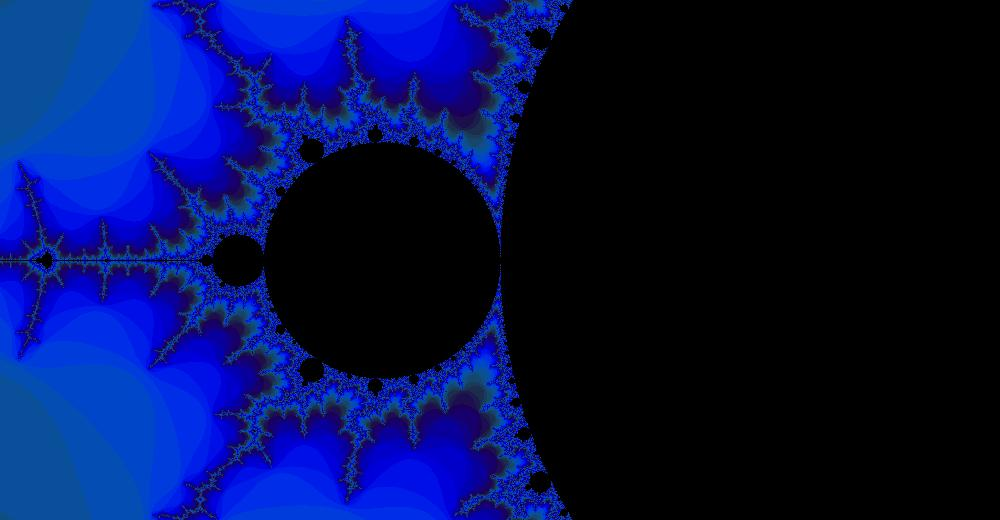

In [177]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:0:0.0005] # c's
#Y, X = np.mgrid[-.13:.13:0.0005, -1.5:-1:0.0005] # c's
#X, Y = np.mgrid[-1.74007:-1.74005:0.00000005, 0.02816:0.02818:0.00000005] # c's
w, h = Y.shape
Y, X = Variable(T(Y)), Variable(T(X))
W = T(w,h).zero_()
x, y, w = X.clone(), Y.clone(), W.clone()
for i in range(3000): x, y, w = MandelbrotIter(x, y, X, Y, w)
DisplayFractal(w.numpy())